# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
!pip install citipy

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 631


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [8]:
# Called JSON to see what the name of the categories are
url = "http://api.openweathermap.org/data/2.5/weather"
city_url = f"{url}?q={city}&appid={weather_api_key}&units=metric"
response = requests.get(city_url)
city_weather = response.json()
city_weather

{'coord': {'lon': 143.2, 'lat': 64.5667},
 'weather': [{'id': 500,
   'main': 'Rain',
   'description': 'light rain',
   'icon': '10d'}],
 'base': 'stations',
 'main': {'temp': 13.56,
  'feels_like': 13.09,
  'temp_min': 13.56,
  'temp_max': 13.56,
  'pressure': 1007,
  'humidity': 81,
  'sea_level': 1007,
  'grnd_level': 951},
 'visibility': 10000,
 'wind': {'speed': 1.32, 'deg': 15, 'gust': 1.41},
 'rain': {'1h': 0.46},
 'clouds': {'all': 97},
 'dt': 1723097074,
 'sys': {'country': 'RU', 'sunrise': 1723053165, 'sunset': 1723115581},
 'timezone': 36000,
 'id': 2120048,
 'name': 'Ust-Nera',
 'cod': 200}

In [9]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | susuman
Processing Record 2 of Set 1 | jamestown
Processing Record 3 of Set 1 | georgetown
Processing Record 4 of Set 1 | tura
Processing Record 5 of Set 1 | thanh hoa
Processing Record 6 of Set 1 | grytviken
Processing Record 7 of Set 1 | papatowai
Processing Record 8 of Set 1 | newman
Processing Record 9 of Set 1 | blackmans bay
Processing Record 10 of Set 1 | west island
Processing Record 11 of Set 1 | jutai
Processing Record 12 of Set 1 | hamilton
Processing Record 13 of Set 1 | albany
Processing Record 14 of Set 1 | san juan bautista
Processing Record 15 of Set 1 | nar'yan-mar
Processing Record 16 of Set 1 | east london
Processing Record 17 of Set 1 | saint-pierre
Processing Record 18 of Set 1 | bilibino
Processing Record 19 of Set 1 | north liberty
Processing Record 20 of Set 1 | dudinka
Processing Record 21 of Set 1 | tlaltenango de sanchez roman
Processing Record 22 of Set 1 | olonkinbyen

In [10]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          608
Lat           608
Lng           608
Max Temp      608
Humidity      608
Cloudiness    608
Wind Speed    608
Country       608
Date          608
dtype: int64

In [11]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,susuman,62.7833,148.1667,11.88,78,100,1.56,RU,1723097075
1,jamestown,42.0970,-79.2353,19.45,94,75,2.57,US,1723097076
2,georgetown,5.4112,100.3354,32.96,62,20,6.69,MY,1723096821
3,tura,25.5198,90.2201,29.28,74,58,3.72,IN,1723097078
4,thanh hoa,19.8000,105.7667,36.82,48,0,1.89,VN,1723097079


In [12]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [13]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,susuman,62.7833,148.1667,11.88,78,100,1.56,RU,1723097075
1,jamestown,42.0970,-79.2353,19.45,94,75,2.57,US,1723097076
2,georgetown,5.4112,100.3354,32.96,62,20,6.69,MY,1723096821
3,tura,25.5198,90.2201,29.28,74,58,3.72,IN,1723097078
4,thanh hoa,19.8000,105.7667,36.82,48,0,1.89,VN,1723097079


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

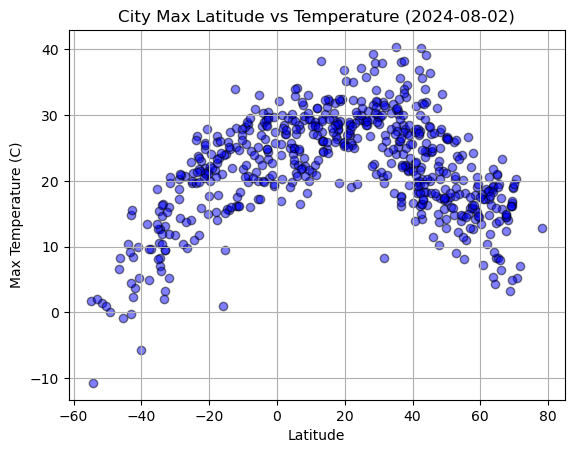

In [15]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'],marker='o',color='blue',edgecolor='black',alpha=0.5)

# Incorporate the other graph properties
plt.title('City Max Latitude vs Temperature (2024-08-02)')
plt.ylabel('Max Temperature (C)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

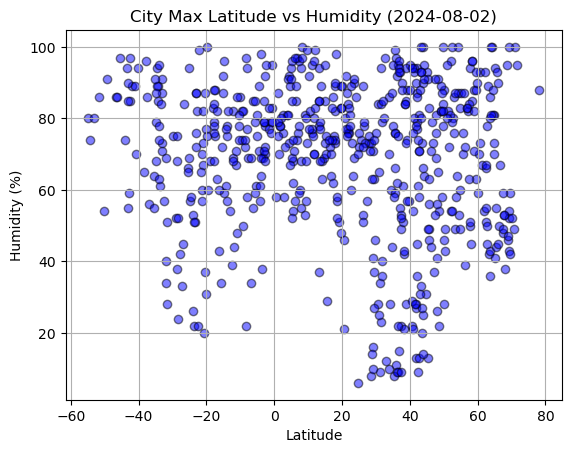

In [17]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'],marker='o',color='blue',edgecolor='black',alpha=0.5)

# Incorporate the other graph properties
plt.title('City Max Latitude vs Humidity (2024-08-02)')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

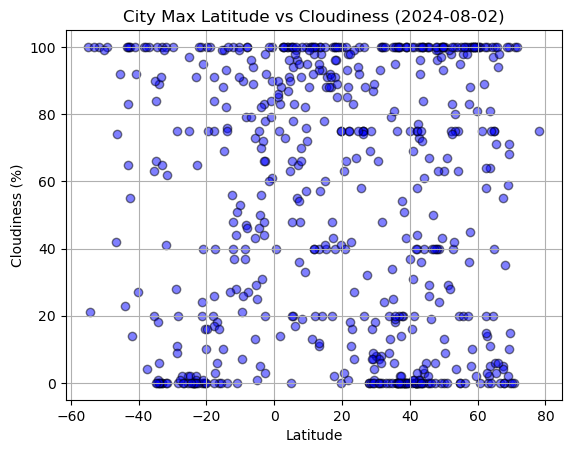

In [19]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'],marker='o',color='blue',edgecolor='black',alpha=0.5)

# Incorporate the other graph properties
plt.title('City Max Latitude vs Cloudiness (2024-08-02)')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

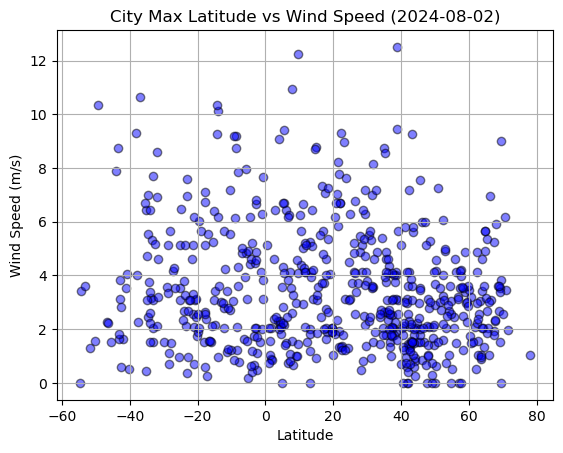

In [21]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'],marker='o',color='blue',edgecolor='black',alpha=0.5)

# Incorporate the other graph properties
plt.title('City Max Latitude vs Wind Speed (2024-08-02)')
plt.ylabel('Wind Speed (m/s)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [23]:
# Define a function to create Linear Regression plots
#(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
#regress_value = x_values*slope+intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

In [24]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,susuman,62.7833,148.1667,11.88,78,100,1.56,RU,1723097075
1,jamestown,42.0970,-79.2353,19.45,94,75,2.57,US,1723097076
2,georgetown,5.4112,100.3354,32.96,62,20,6.69,MY,1723096821
3,tura,25.5198,90.2201,29.28,74,58,3.72,IN,1723097078
4,thanh hoa,19.8000,105.7667,36.82,48,0,1.89,VN,1723097079


In [25]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat']<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
5,grytviken,-54.2811,-36.5092,-10.70,74,21,3.42,GS,1723097081
6,papatowai,-46.5619,169.4708,6.54,86,42,2.28,NZ,1723097082
8,blackmans bay,-43.0167,147.3167,14.85,55,100,3.13,AU,1723097084
9,west island,-12.1568,96.8225,27.99,69,40,5.66,CC,1723097086
10,jutai,-5.1833,-68.9000,23.27,75,1,0.19,BR,1723097087


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.3372303020095337


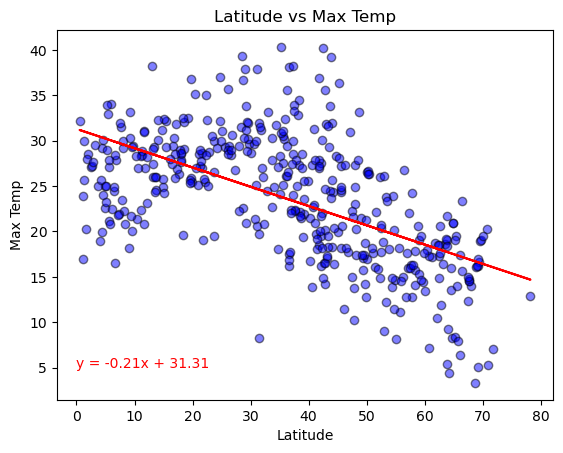

In [27]:
# Linear regression on Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'])
regress_value = (northern_hemi_df['Lat'])*slope+intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f'The r^2-value is: {rvalue**2}')
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'],marker='o',color='blue',edgecolor='black',alpha=0.5)
plt.plot(northern_hemi_df['Lat'],regress_value,color='red')
plt.title('Latitude vs Max Temp')
plt.ylabel('Max Temp')
plt.xlabel('Latitude')
plt.annotate(line_eq,(0,5),color='red')
plt.show()


The r^2-value is: 0.6145615340065324


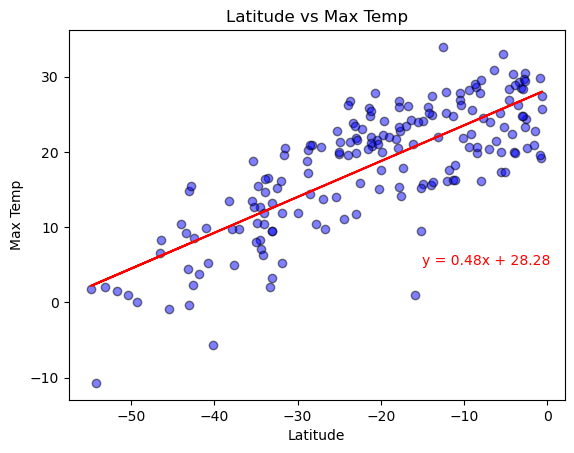

In [28]:
# Linear regression on Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'])
regress_value = (southern_hemi_df['Lat'])*slope+intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f'The r^2-value is: {rvalue**2}')
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'],marker='o',color='blue',edgecolor='black',alpha=0.5)
plt.plot(southern_hemi_df['Lat'],regress_value,color='red')
plt.title('Latitude vs Max Temp')
plt.ylabel('Max Temp')
plt.xlabel('Latitude')
plt.annotate(line_eq,(-15,5),color='red')
plt.show()

**Discussion about the linear relationship:** Regarding the relationship between latitude and maximum temperature, there is a moderate correlation between these two variables, as indicated by the R^2 values. The graphs illustrate that temperatures increase as you approach the equator (latitude = 0), while they decrease as you move further away from the equator in either direction.

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.013070937793650603


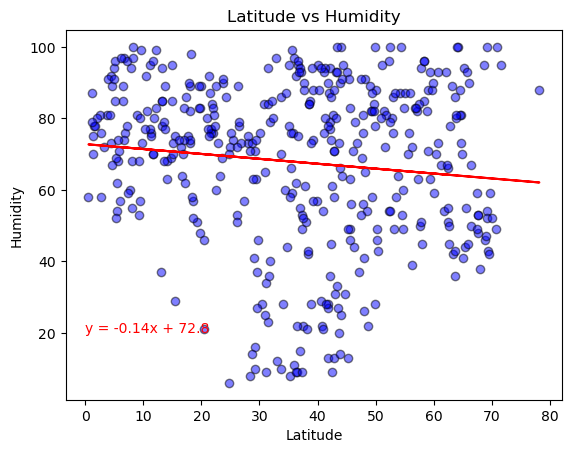

In [31]:
# Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df['Lat'],northern_hemi_df['Humidity'])
regress_value = (northern_hemi_df['Lat'])*slope+intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f'The r^2-value is: {rvalue**2}')
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Humidity'],marker='o',color='blue',edgecolor='black',alpha=0.5)
plt.plot(northern_hemi_df['Lat'],regress_value,color='red')
plt.title('Latitude vs Humidity')
plt.ylabel('Humidity')
plt.xlabel('Latitude')
plt.annotate(line_eq,(0,20),color='red')
plt.show()

The r^2-value is: 0.0025905495229165865


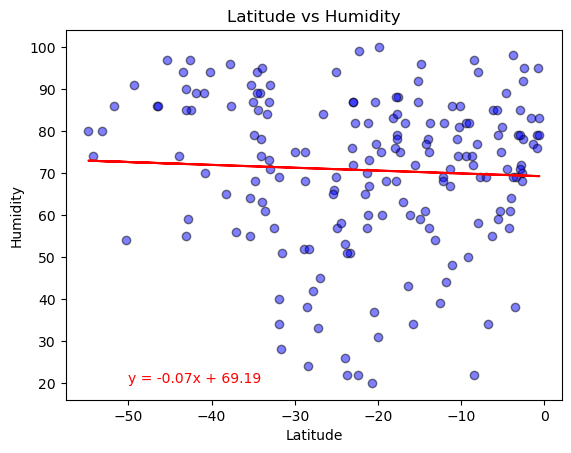

In [32]:
# Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df['Lat'],southern_hemi_df['Humidity'])
regress_value = (southern_hemi_df['Lat'])*slope+intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f'The r^2-value is: {rvalue**2}')
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Humidity'],marker='o',color='blue',edgecolor='black',alpha=0.5)
plt.plot(southern_hemi_df['Lat'],regress_value,color='red')
plt.title('Latitude vs Humidity')
plt.ylabel('Humidity')
plt.xlabel('Latitude')
plt.annotate(line_eq,(-50,20),color='red')
plt.show()

**Discussion about the linear relationship:** Regarding the relationship between latitude and humidity, there is a very weak correlation between these two variables, as indicated by 𝑅^2 values close to 0. This suggests that the dataset has minimal predictive power for humidity based on latitude and should not be relied upon for making predictions. Since the data points are scattered throughout the entire graph there is no direct correlation that latitude effects humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.028541912751509493


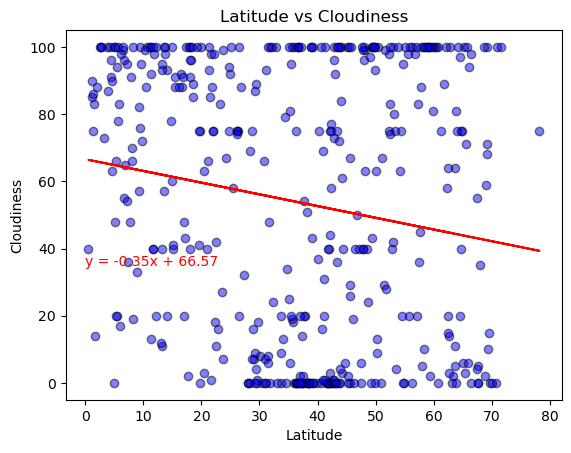

In [35]:
# Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'])
regress_value = (northern_hemi_df['Lat'])*slope+intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f'The r^2-value is: {rvalue**2}')
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'],marker='o',color='blue',edgecolor='black',alpha=0.5)
plt.plot(northern_hemi_df['Lat'],regress_value,color='red')
plt.title('Latitude vs Cloudiness')
plt.ylabel('Cloudiness')
plt.xlabel('Latitude')
plt.annotate(line_eq,(0,35),color='red')
plt.show()

The r^2-value is: 5.3104808513753735e-05


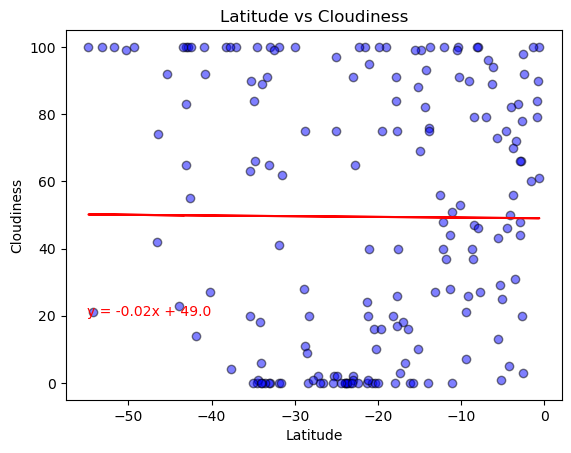

In [36]:
# Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'])
regress_value = (southern_hemi_df['Lat'])*slope+intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f'The r^2-value is: {rvalue**2}')
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'],marker='o',color='blue',edgecolor='black',alpha=0.5)
plt.plot(southern_hemi_df['Lat'],regress_value,color='red')
plt.title('Latitude vs Cloudiness')
plt.ylabel('Cloudiness')
plt.xlabel('Latitude')
plt.annotate(line_eq,(-55,20),color='red')
plt.show()

**Discussion about the linear relationship:** Regarding the relationship between latitude and cloudiness, this dataset is not suitable for making predictions, as the R^2 value is around 0, indicating a very weak correlation between the two variables.

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.028768674482826457


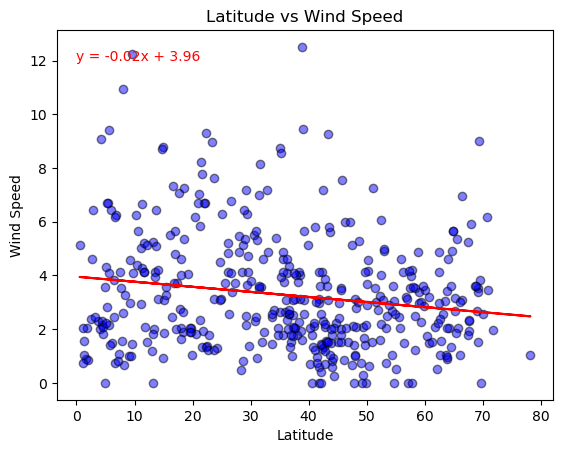

In [39]:
# Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'])
regress_value = (northern_hemi_df['Lat'])*slope+intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f'The r^2-value is: {rvalue**2}')
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'],marker='o',color='blue',edgecolor='black',alpha=0.5)
plt.plot(northern_hemi_df['Lat'],regress_value,color='red')
plt.title('Latitude vs Wind Speed')
plt.ylabel('Wind Speed')
plt.xlabel('Latitude')
plt.annotate(line_eq,(0,12),color='red')
plt.show()

The r^2-value is: 8.771544942498987e-05


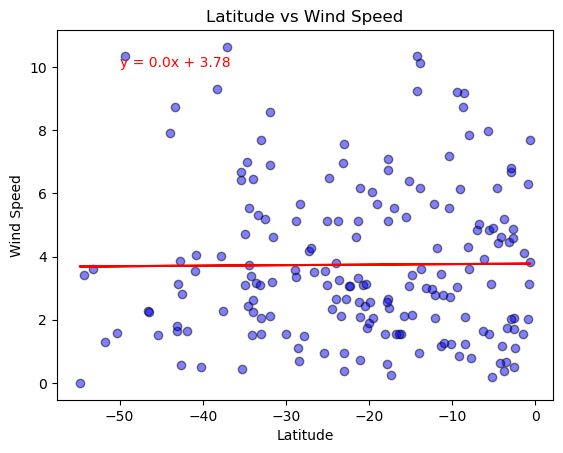

In [40]:
# Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'])
regress_value = (southern_hemi_df['Lat'])*slope+intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f'The r^2-value is: {rvalue**2}')
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'],marker='o',color='blue',edgecolor='black',alpha=0.5)
plt.plot(southern_hemi_df['Lat'],regress_value,color='red')
plt.title('Latitude vs Wind Speed')
plt.ylabel('Wind Speed')
plt.xlabel('Latitude')
plt.annotate(line_eq,(-50,10),color='red')
plt.show()

**Discussion about the linear relationship:** Regarding Latitude vs Wind Speed there is not a great correlation between the two variables in order to use this data set to create powerful predictions. Since the R^2 value is around 0 it would be best to avoid using this dataset for future predictions. 